In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu

In [2]:
RUTA = "../data/"

In [3]:
df_meta = pd.read_csv(RUTA + "SindromeMetabolico_Limpio.csv")
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2401 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2401 non-null   float64
 6   BMI                2401 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   int64  
 14  Nulo_marital       2401 non-null   bool   
 15  Nulo_income        2401 non-null   bool   
dtypes: bool(2), float64(5), 

### Análisis univariante de las columnas categóricas

In [4]:
#Creamos dos listas, una con las variables numéricas y otra con las variables categóricas que ya hemos clasificado anteriormente
columnas_numericas = ["WaistCirc","BMI","UrAlbCr","UricAcid","BloodGlucose","HDL","Triglycerides","Income"]
columnas_categoricas = ["Sex", "Marital", "Race", "MetabolicSyndrome", "Albuminuria"]

In [5]:
# Muestro los valores absolutos de cada variable categórica que me sirve para ver la moda en éstos valores
for categoria in columnas_categoricas:
    print(f"Para {categoria}")
    print(25*"*")
    print(df_meta[categoria].value_counts())
    print(25*"*")
    print()
    

Para Sex
*************************
Sex
Female    1211
Male      1190
Name: count, dtype: int64
*************************

Para Marital
*************************
Marital
Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: count, dtype: int64
*************************

Para Race
*************************
Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: count, dtype: int64
*************************

Para MetabolicSyndrome
*************************
MetabolicSyndrome
0    1579
1     822
Name: count, dtype: int64
*************************

Para Albuminuria
*************************
Albuminuria
0    2089
1     254
2      58
Name: count, dtype: int64
*************************



In [6]:
# Muestro los valores de frecuencia relativa para cada variable categórica
for categoria in columnas_categoricas:
    print(f"Para {categoria}")
    print(25*"*")
    print(df_meta[categoria].value_counts()/len(df_meta)*100)
    print(25*"*")
    print()
    

Para Sex
*************************
Sex
Female    50.437318
Male      49.562682
Name: count, dtype: float64
*************************

Para Marital
*************************
Marital
Married      49.645981
Single       20.741358
Divorced     10.079134
Widowed       6.913786
Separated     3.956685
Name: count, dtype: float64
*************************

Para Race
*************************
Race
White          38.858809
Black          22.823823
Asian          14.535610
Hispanic       10.703873
MexAmerican    10.537276
Other           2.540608
Name: count, dtype: float64
*************************

Para MetabolicSyndrome
*************************
MetabolicSyndrome
0    65.764265
1    34.235735
Name: count, dtype: float64
*************************

Para Albuminuria
*************************
Albuminuria
0    87.005414
1    10.578925
2     2.415660
Name: count, dtype: float64
*************************



In [7]:
def frequencias_absolutas(dataframe, columnas_categoricas):
    """
    Función que dado un dataframe y una lista con las columnas categóricas de éste
    pinta los gráficos de frecuencia absoluta de cada columna con sus valores anotados 
    """
    num_cols = len(columnas_categoricas)
    num_filas = (num_cols // 2) + (num_cols % 2)
    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 
    for i, col in enumerate(columnas_categoricas):
        ax = axes[i] if num_cols > 1 else axes
        freq = dataframe[col].value_counts()
        barra = sns.barplot(x=freq.index, y=freq, ax=ax, palette='cool', hue = freq.index, legend = False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('Categorías')
        ax.set_ylabel('Frecuencia Absoluta')
        ax.tick_params(axis='x', rotation=45)

        for index, value in enumerate(freq):
            barra.text(index, value + 0.1, str(value), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

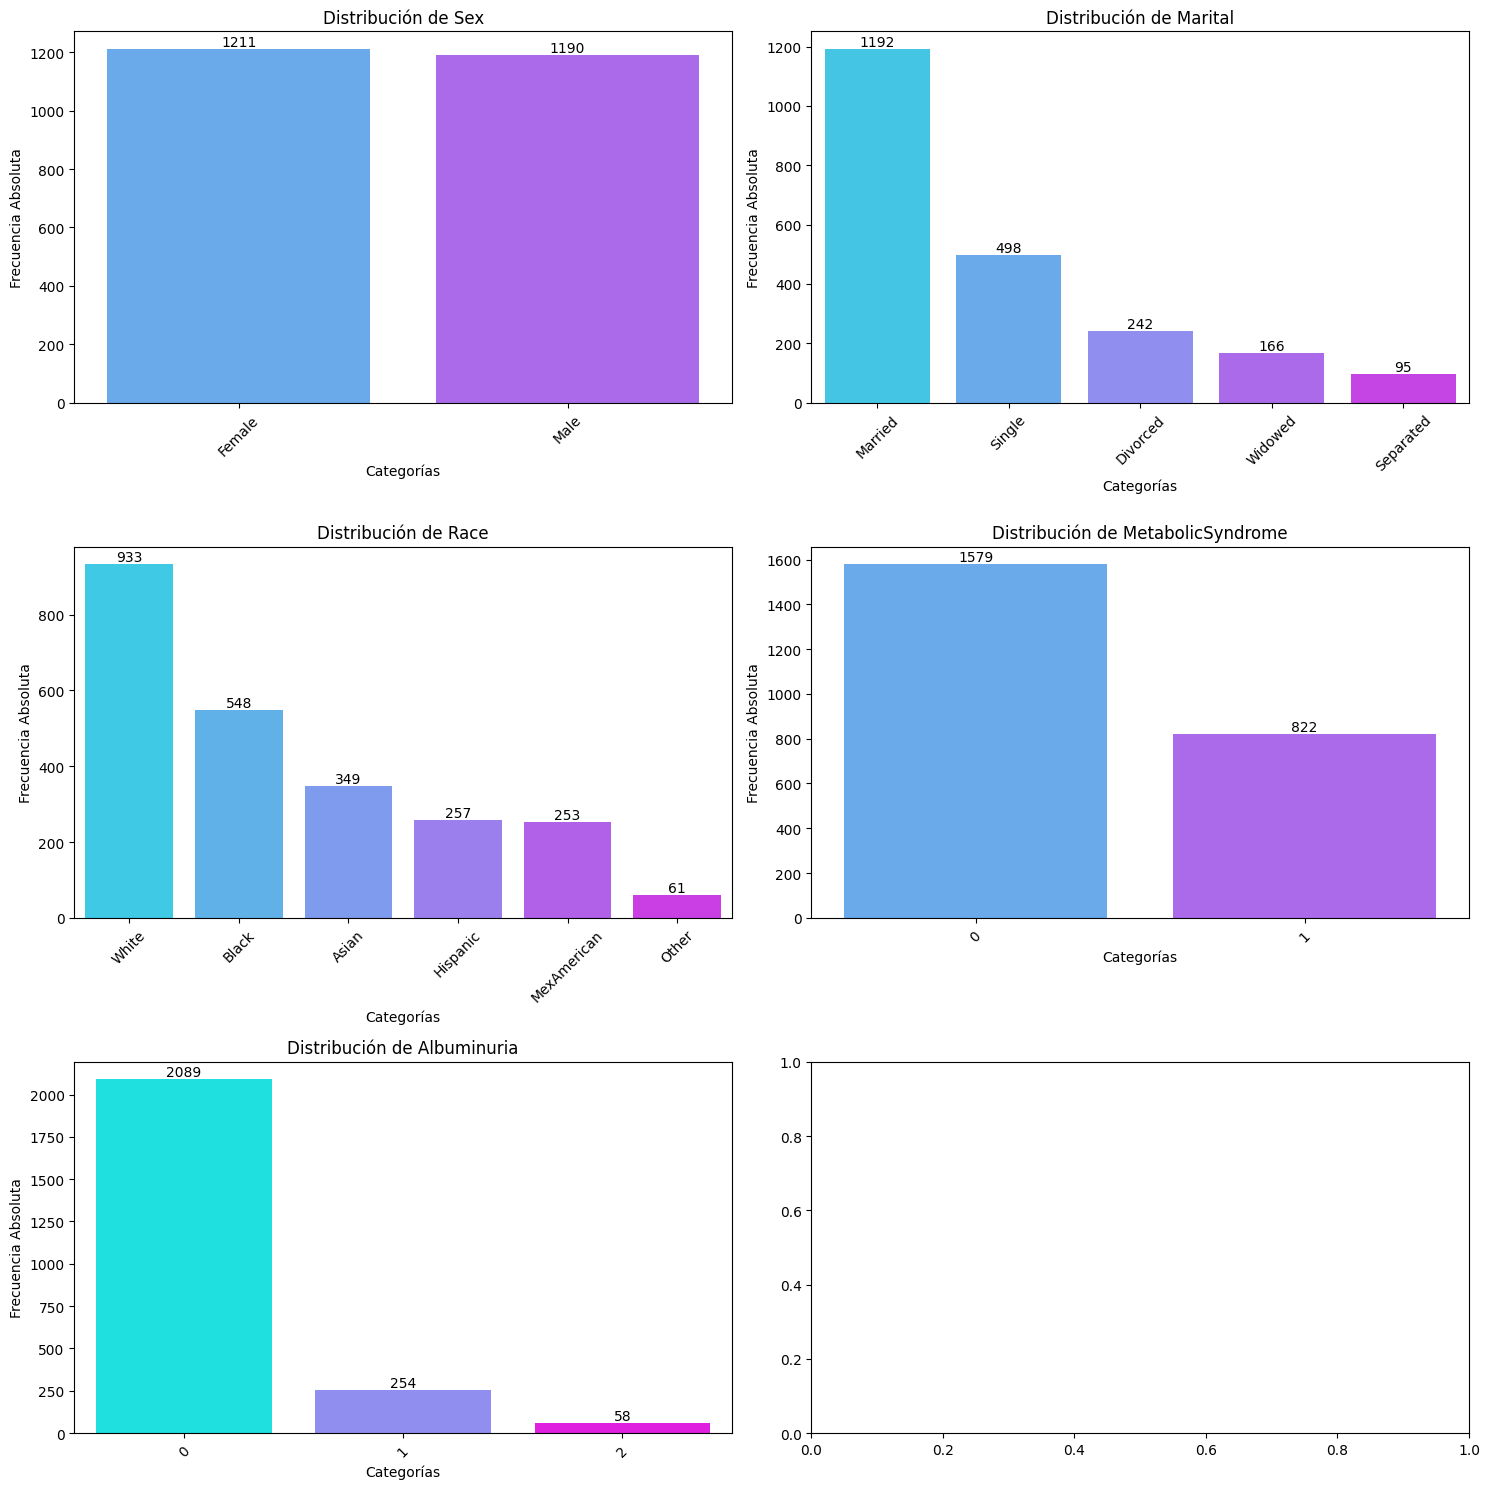

In [8]:
frequencias_absolutas(df_meta, columnas_categoricas)

In [9]:
def frecuencias_relativas(dataframe, columnas_categoricas):
    """
    Función que dado un dataframe y una lista con las columnas categóricas de éste
    pinta los gráficos de frecuencia relativa de cada columna con sus valores anotados 
    """
    num_cols = len(columnas_categoricas)
    num_filas = (num_cols // 2) + (num_cols % 2)
    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 
    for i, col in enumerate(columnas_categoricas):
        ax = axes[i] if num_cols > 1 else axes
        freq = round(dataframe[col].value_counts()/len(dataframe)*100,2)
        barra = sns.barplot(x=freq.index, y=freq, ax=ax, palette='cool', hue = freq.index, legend = False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('Categorías')
        ax.set_ylabel('Frecuencia Relativa')
        ax.tick_params(axis='x', rotation=45)
        for index, value in enumerate(freq):
            barra.text(index, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

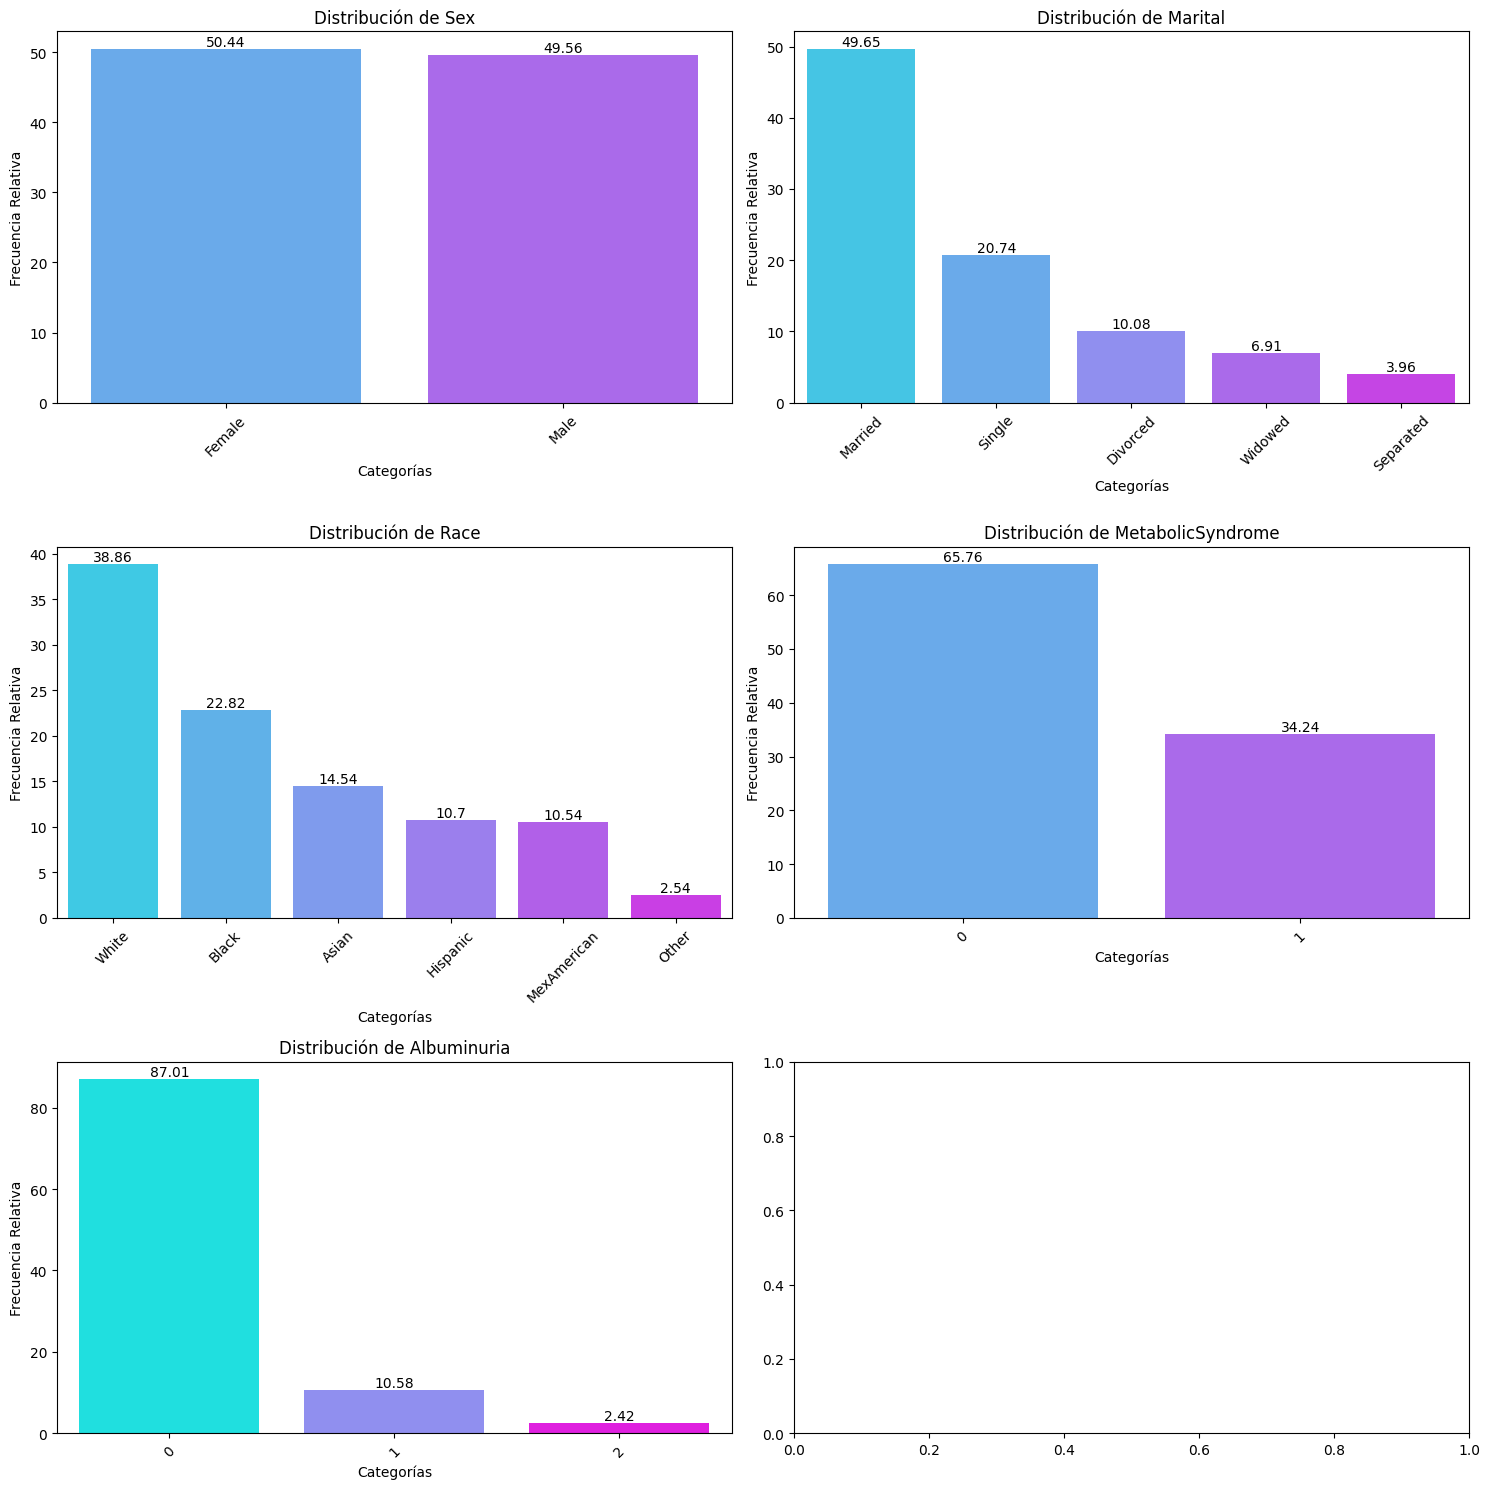

In [10]:
frecuencias_relativas(df_meta, columnas_categoricas)

#### Observaciones:

***Sex***:
- Según estos valores, hay casi la misma cantidad de hombres y mujeres en la población de estudio. Voy a relacionarlo con mi variable objetivo "Síndrome Metabólico" para determinar si se mantiene esta relación equilibrada o si el género influye en la presencia de esta condición.

***Marital***:
- Esta variable muestra la distribución de valores según el estado civil del individuo. Es evidente que la mitad de los individuos (49.65%) están casados, y la otra mitad se distribuye entre solteros (20.74%), divorciados (10.08%) y viudos y solteros que no llegan ni al 10% de la población de estudio.

***Race***:
- Casi el 40% de los individuos son blancos; el resto de la población se divide en población afroamericana (22.82%), asiáticos (14.54%) y los valores restantes se dividen entre hispanos, mexicano-americanos y otras razas no descritas.

***MetabolicSyndrome***:
- Esta es nuestra variable principal y, por el momento, podemos afirmar que el 65.76% de los individuos no tenía síndrome metabólico, frente a un 34.24% que sí presenta esta condición. Realizaremos análisis bivariados y multivariados con ella para determinar si la presencia o ausencia de esta condición está relacionada con el sexo, el estado civil y la raza.

***Albuminuria***:

- Esta variable indica que la mayoría de los individuos tenía valores normales de albúmina en la orina y no sufrían daño renal al momento del estudio (87.01%). Aproximadamente el 10% tenía valores moderadamente altos, lo que significa el inicio de enfermedad renal, y el 3% restante ya sufría de daño renal avanzado con valores muy por encima de lo normal.

Finalmente, es necesario realizar un análisis bivariante y multivariante de todas las columnas categóricas con "MetabolicSyndrome" para determinar cómo se correlacionan y cuánto influyen estas variables en la presencia o ausencia de la condición.

### Análisis univariante de las columnas numéricas

In [11]:
df_meta.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2401.0,48.691795,17.632852,20.0,34.00,48.00,63.00,80.000000
Income,2401.0,3810.079134,3007.464054,0.0,1600.00,2500.00,6200.00,9000.000000
WaistCirc,2401.0,98.307254,15.962233,56.2,87.00,97.50,107.20,176.000000
BMI,2401.0,29.455930,9.788887,13.4,24.00,27.80,32.30,98.307254
Albuminuria,2401.0,0.154102,0.422780,0.0,0.00,0.00,0.00,2.000000
UrAlbCr,2401.0,43.626131,258.272829,1.4,4.45,7.07,13.69,5928.000000
UricAcid,2401.0,5.489046,1.439358,1.8,4.50,5.40,6.40,11.300000
BloodGlucose,2401.0,108.247813,34.820657,39.0,92.00,99.00,110.00,382.000000
HDL,2401.0,53.369429,15.185537,14.0,43.00,51.00,62.00,156.000000
Triglycerides,2401.0,128.125364,95.322477,26.0,75.00,103.00,150.00,1562.000000


In [12]:
# Calculamos el IQR de cada variable númerica
def get_IQR(df, lista_columnas):
    iqr = {}
    for columna in lista_columnas:
        iqr[columna] = (df[columna].quantile(0.75) - df[columna].quantile(0.25))
    return iqr

In [13]:
get_IQR(df_meta, columnas_numericas)

{'WaistCirc': 20.200000000000003,
 'BMI': 8.299999999999997,
 'UrAlbCr': 9.239999999999998,
 'UricAcid': 1.9000000000000004,
 'BloodGlucose': 18.0,
 'HDL': 19.0,
 'Triglycerides': 75.0,
 'Income': 4600.0}

In [14]:
# Calculamos el coeficiente de varianza de cada columna numércia
def variabilidad(df, columnas_numericas):
    df_var = df[columnas_numericas].describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

In [15]:
variabilidad(df_meta, columnas_numericas)

,std,mean,CV
WaistCirc,15.962233,98.307254,0.162371
BMI,9.788887,29.455930,0.332323
UrAlbCr,258.272829,43.626131,5.920141
UricAcid,1.439358,5.489046,0.262224
BloodGlucose,34.820657,108.247813,0.321675
HDL,15.185537,53.369429,0.284536
Triglycerides,95.322477,128.125364,0.743978
Income,3007.464054,3810.079134,0.789344


Me llama la atención que casi todas las variables tiene una alta variabilidad, excepto "WaistCirc","UricAcid","HDL", y lo que más llama la atencíon es la altisima variabilidad que tiene "UrAlbCr". Sin duda tendremos outliers que habrá que tratar más adelante. De momento haremos los histogramas con la función de densidad y los diagramas de caja para analizar mejor.

In [16]:
def boxplot_histograma(dataframe, columna):
    """
    Función que dibuja los diagramas de caja e histogramas
    con la densidad categórica de las variables numéricas.
    """ 
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=dataframe[columna], whis= 3) # Dejamos el whis en 3 para que sea una medida más conservadora y que los valores atípicos sean los más extremos
    plt.title(f'Boxplot de {columna}')

    plt.subplot(1, 2, 2)
    sns.histplot(data=dataframe, x=columna, kde=True)
    plt.title(f'Histograma con densidad categórica de {columna}')

    plt.tight_layout()
    plt.show()

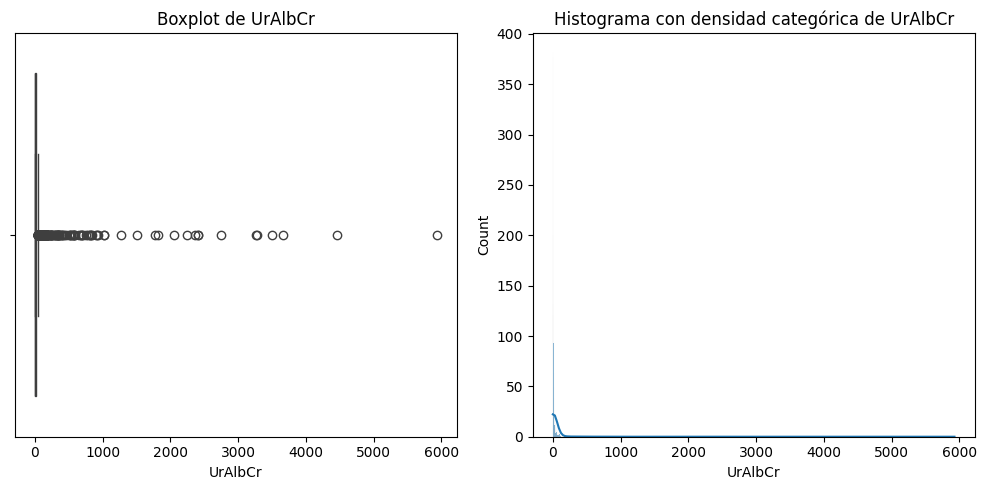

In [17]:
boxplot_histograma(df_meta, "UrAlbCr")

Como ya había visto **la variabilidad de "UrAlbCr" es super ALTA**, vamos a tratarla antes de continuar con el análisis:


Lo más lógico sería aplicarle el logaritmo o tratar de categorizarla, pero como sé que la relación albúmina-creatinina (UrAlbCr) en la orina está estrechamente relacionada con la "Albuminuria" y que ambas pruebas están diseñadas para evaluar la cantidad de albúmina presente en la orina y son utilizadas como indicadores de problemas renales o daño renal.Se que están estrechamente relacionadas en el sentido de que buscan evaluar y medir la cantidad de albúmina en la orina en una muestra de orina de 24 horas:

- *Valor normal*= Menos de 30 miligramos (mg) de albúmina por gramo (g) de creatinina (menos de 30 mg/g de creatinina) en una muestra de orina (tanto en una medición de albúmina en orina aleatoria como en una muestra de orina de 24 horas).
- *Valor moderadamente alto(Microalbuminuria)*=  Entre 30 y 300 mg/g de creatinina. Esto se considera un estado intermedio entre los niveles normales y la albuminuria franca.
- *Valores anormales (Albuminuria franca)* =  Mayor a 300 mg/g de creatinina. Este nivel elevado de albúmina en la orina generalmente se asocia con enfermedad renal o daño renal significativo.
 
Decido comprobar su relación y si es así voy a eliminar la columna de "UrAlbCr" y me quedaré con "Albuminuria" ya que para el presenta EDA me sirve esta columna que ya está categorizada.

In [18]:
def categorizar(valor):
    """
    Función que dado un valor, en este caso "UrAlbCr"
    categoriza los valores
    """

    if valor >= 0 and valor < 30: #Valores normales
        return 0
    elif valor >= 30 and valor <= 300:  #Microalbuminuria
        return 1
    elif valor > 300 and valor <= 10000:   #AlbumiuriaFranca
        return 2
    else:
        return None  # Manejar valores fuera de los rangos especificados según sea necesario


In [19]:
# Crear una nueva columna utilizando la función definida
df_meta["UrAlbCr_Cat"]  = df_meta["UrAlbCr"].apply(categorizar)
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2401 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2401 non-null   float64
 6   BMI                2401 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   int64  
 14  Nulo_marital       2401 non-null   bool   
 15  Nulo_income        2401 non-null   bool   
 16  UrAlbCr_Cat        2401 

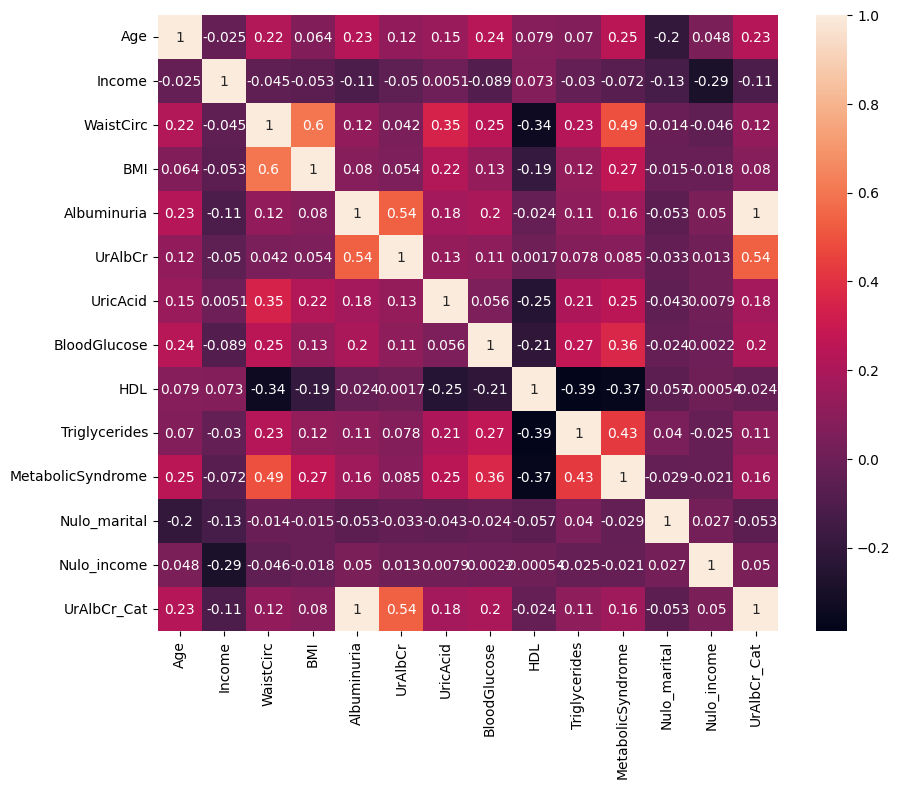

In [20]:
#Hago un mapa de calor para ver como se relacionan "Albumuria" con "UrAlbCr_Cat"
plt.figure(figsize=(10, 8))
sns.heatmap(df_meta.corr(numeric_only=True), annot=True);

<Axes: xlabel='Albuminuria', ylabel='UrAlbCr_Cat'>

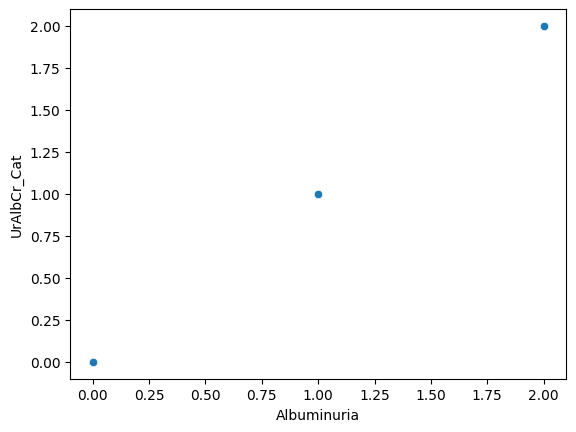

In [21]:
# Hago un scatterplot para corroborar que los puntos de ambas variables se correlacionan
sns.scatterplot(x=df_meta["Albuminuria"], y=df_meta["UrAlbCr_Cat"] )

Hecho estas dos comprobaciones, demostramos que categorizar "UrAlbCr" nos aporta la misma información que la columna "Albuminuria", así que eliminamos "UrAlbCr" del dataset. Seguimos el análisis de las otras variables numéricas.

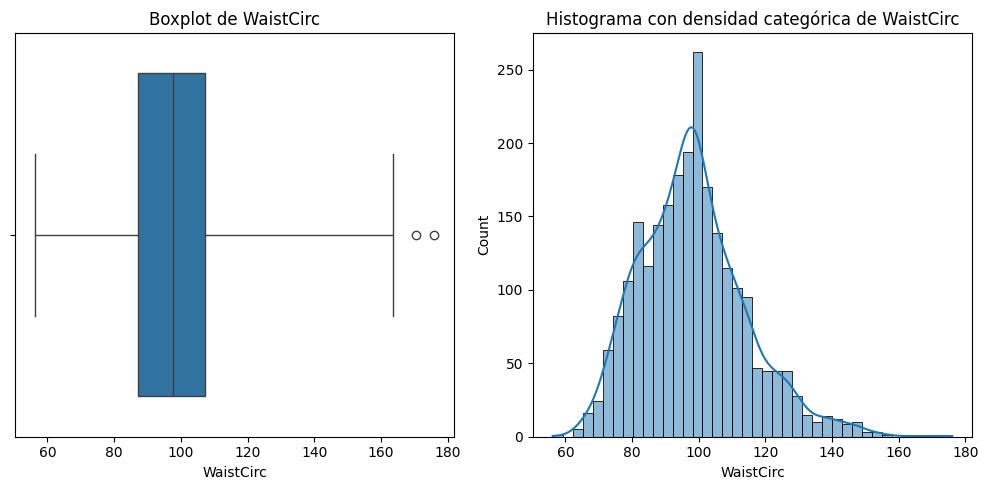

In [22]:
boxplot_histograma(df_meta, "WaistCirc")

**"WaistCirc"**: Se observa una gráfica bastante simétrica, lo que representa bien los valores de tendencia central: la media es 98.30 y la mediana es 97.50. Además, muestra poca dispersión (coeficiente de variación del 16.32%). Se identifican pocos valores atípicos, los cuales están solo por encima del umbral (pacientes con mediciones de circunferencia abdominal que superan los 150 cm). Sería interesante establecer una relación con "BMI", "BloodGlucose", "HDL" y "Triglycerides" para corroborar si en conjunto pueden ser indicativos del síndrome metabólico.

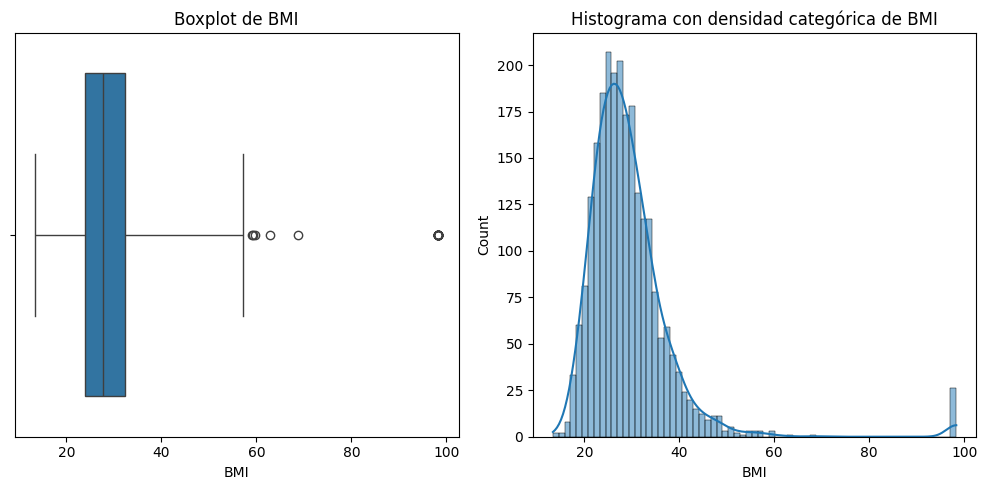

In [23]:
boxplot_histograma(df_meta, "BMI")

**"BMI"**: Se observa una gráfica con una ligera asimetría hacia la derecha, lo que indica una distribución menos simétrica. El coeficiente de variación es aproximadamente del 33%. Las medidas de tendencia central muestran una buena representación: la media es 29.4 y la mediana es 27.8. Se identifican outliers por encima, destacando uno que sobrepasa significativamente los valores de la media. 

Podemos categorizar esta variable basandonos en las clasificaciones de BMI:
- Bajo peso: < 18.5
- Normal: 18.5 – 24.9
- Sobrepeso: 25.0 – 29.9
- Obesidad: > 30.0

¿Se relaciona este outlier con el outlier de "WaistCirc"?

Sería interesante establecer una relación con "WaistCirc", "BloodGlucose", "HDL" y "Triglycerides" para corroborar si en conjunto pueden ser indicativos del síndrome metabólico, ya que son factores de riesgo conocidos para desarrollar esta patología.

***De momento no se trataran los outliers***

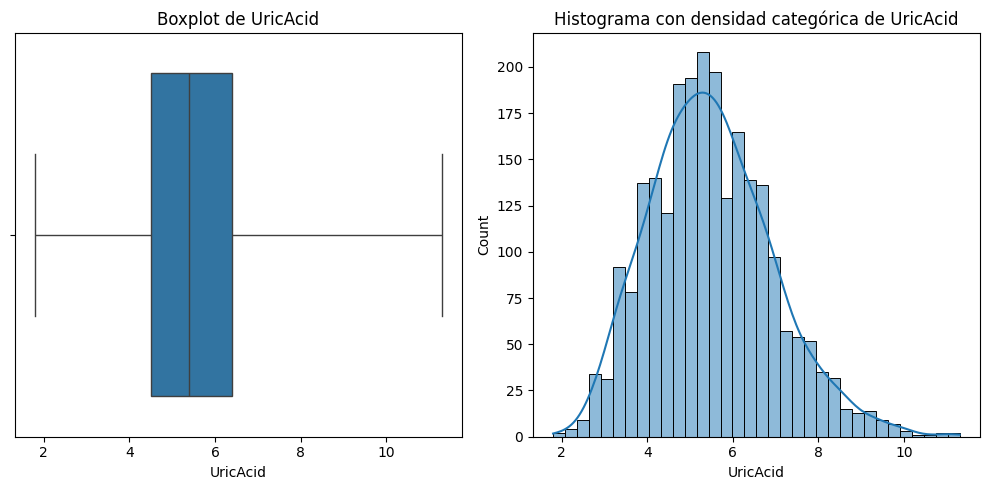

In [24]:
boxplot_histograma(df_meta, "UricAcid")

**UricAcid**: Se aprecia una gráfica completamente simétrica, sin outliers identificables. Las medidas de tendencia central son prácticamente iguales, con una media de 5.48 y una mediana de 5.40. Además, el coeficiente de variación es menor al 30%.

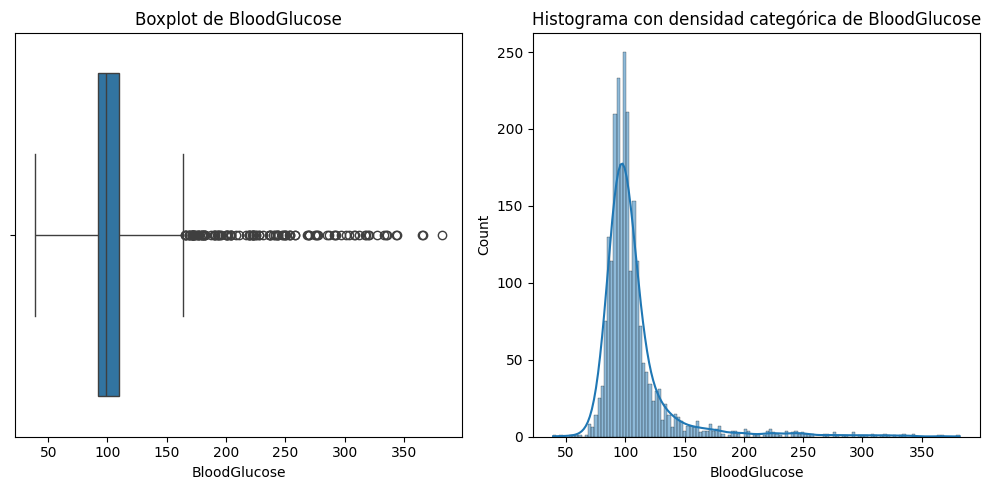

In [25]:
boxplot_histograma(df_meta, "BloodGlucose")

**BloodGlucose**: Se visualiza una gráfica con asimetría hacia la derecha, evidenciando medidas de tendencia central ligeramente distintas; la media es 108.24 y la mediana es 99. Además, se identifica una cola hacia la derecha con outliers que se encuentran notablemente por encima de la media. El coeficiente de variación es superior al 30%, lo que confirma una mayor dispersión de los valores. Esta variable podría categorizarse utilizando los siguientes rangos:
- Nivel normal: < 99 mg/dl en ayunas
- Prediabetes: entre 100 y 125 mg/dl
- Diabetes: > 126 mg/dl

Es relevante preguntarse si los mismos individuos presentan estos valores tan elevados. ¿Existe una relación entre estos valores y los de "BMI" o "WaistCirc"? Además, se plantea la interrogante sobre si estos resultados guardan relación con el síndrome metabólico. Para obtener una comprensión más profunda, será necesario correlacionar todas las variables entre sí.

***De momento no se trataran los outliers***

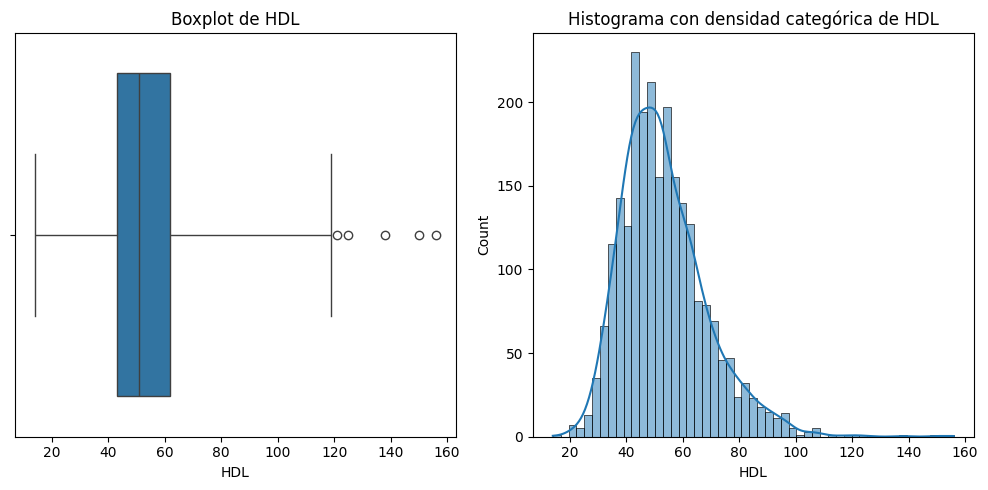

In [26]:
boxplot_histograma(df_meta, "HDL")

**HDL**: Se muestra una gráfica completamente simétrica con una escasez notable de outliers. Aquellos que se identifican están por encima de los valores de tendencia central, los cuales son prácticamente idénticos: la media es de 53.36 y la mediana de 51. Además, se observa un coeficiente de variación inferior al 30%, lo que indica una dispersión mínima de los valores en esta variable.


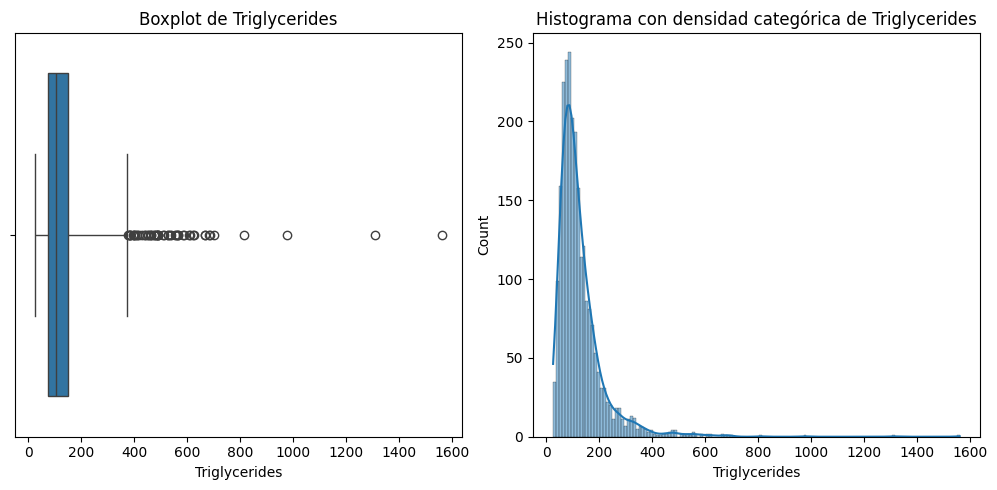

In [27]:
boxplot_histograma(df_meta, "Triglycerides")

**Triglycerides**: La gráfica presenta asimetría hacia la derecha, evidenciando una larga cola y múltiples outliers por encima de la distribución principal. Se nota una alta dispersión de valores, con un coeficiente de variación aproximado del 74%. Las medidas de tendencia central confirman este sesgo hacia la derecha, ya que la media es de 128 y la mediana es de 103. Considerando estos hallazgos, se podría considerar una categorización de la variable de la siguiente manera:
- Nivel normal: < 150 miligramos por decilitro (mg/dl) en adultos; por debajo de 90 mg/dl en niños y adolescentes (de 10 a 19 años)
- Niveles ligeramente altos: Entre 150 y 199 mg/dl
- Niveles altos: Entre 200 y 499 mg/dl

***De momento no se tratarán los outliers***

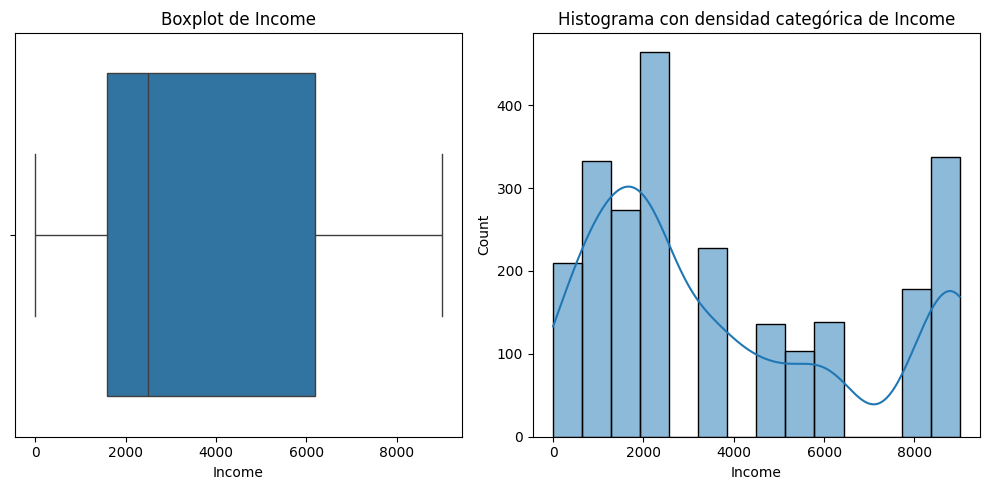

In [28]:
boxplot_histograma(df_meta, "Income")

**Income**:  La gráfica muestra una distribución completamente asimétrica. Los valores de 0 representan datos nulos que se imputaron para preservar la integridad de las otras variables. Es evidente que la distribución no sigue un patrón normal, con una media de 3810 y una mediana de 2500. Además, se observa un coeficiente de variación superior al 70%, indicando una alta variabilidad en los datos.

Antes de pasar al análisis bivariante elimino del dataframe la columna de "UrAlbCr" porque tiene muchos outliers y al categorizarla nos aporta lo mismo que "Albuminuria", y también elimino "UrAlbCr_Cat" ya que se creó con el fin de corroborar lo anteriormente dicho.


In [29]:
df_meta.drop(columns =["UrAlbCr", "UrAlbCr_Cat"], inplace= True)

In [30]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2401 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2401 non-null   float64
 6   BMI                2401 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UricAcid           2401 non-null   float64
 9   BloodGlucose       2401 non-null   int64  
 10  HDL                2401 non-null   int64  
 11  Triglycerides      2401 non-null   int64  
 12  MetabolicSyndrome  2401 non-null   int64  
 13  Nulo_marital       2401 non-null   bool   
 14  Nulo_income        2401 non-null   bool   
dtypes: bool(2), float64(4), int64(6), object(3)
memory usage: 248.7+ KB


### Análisis bivariante de todas las variables contra la variable objetivo (MetabolicSyndrome)

In [128]:
def barplot_categorica(df, columna_cat):
    """
    Función que crea un gráfico donde se muestra la frecuencia relativa
    de una columna categórica    
    """
    freq = round(df[columna_cat].value_counts()/len(df_meta)*100,2)
    barra = sns.barplot(x=freq.index, y=freq, palette='cool', hue = freq.index, legend = False)
    plt.xlabel("MetabolicSyndrome")
    plt.ylabel("Frecuencia Relativa")
    plt.title("Distribución Sindrome Metabólico")

    for index, value in enumerate(freq):
        barra.text(index, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
plt.show();

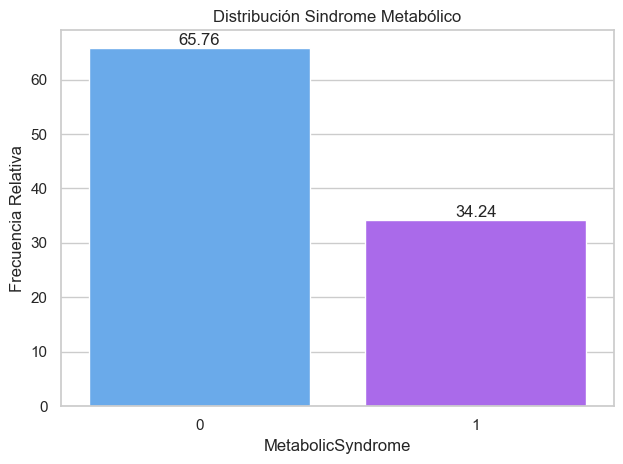

In [129]:
barplot_categorica(df_meta, "MetabolicSyndrome")   

In [152]:
def bivariante_cat(df, cat_col1, cat_col2,  show_values= True):
    
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    
    count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data, palette= "cool")

    plt.title(f'Relación entre {cat_col1} y {cat_col2}')
    plt.xlabel(cat_col1)
    plt.ylabel('Frecuencia Relativa')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

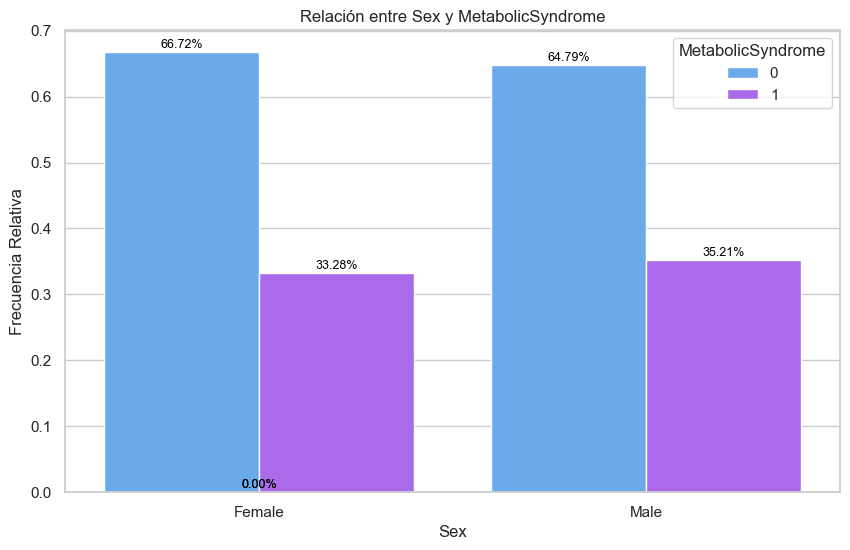

In [154]:
bivariante_cat(df_meta, "Sex", "MetabolicSyndrome")

- No se observa una relación significativa entre el género y la presencia o ausencia del síndrome metabólico en términos relativos.

In [132]:
# Empleamos el test chi2 para corroborar que estadísticamente no existe relación entre Sex y MetabolicSyndrome

tabla_contingencia = pd.crosstab(df_meta["MetabolicSyndrome"],df_meta["Sex"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.9108914813100117
P-Value: 0.3398779931081079
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[796.40524781 782.59475219]
 [414.59475219 407.40524781]]


- Como lo esperaba no existe relación entre ambas variables

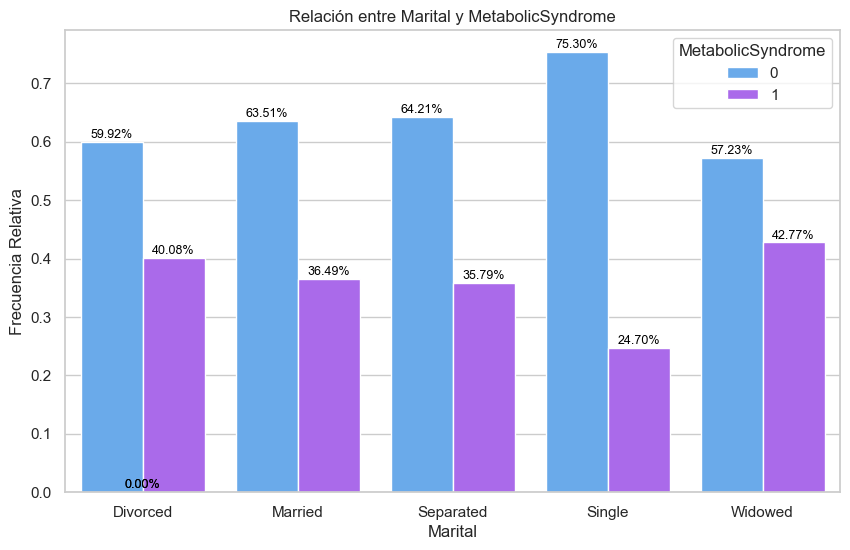

In [153]:
bivariante_cat(df_meta, "Marital", "MetabolicSyndrome")

- Se observa que el estado civil parece influir en la presencia o ausencia del Síndrome Metabólico, especialmente en el caso de los viudos, donde se observa una mayor proporción de personas viudas con Síndrome Metabólico en comparación con los que no lo padecen. Por otro lado, ocurre lo contrario con los solteros. Sin embargo, surge la pregunta: ¿Esto está relacionado con el estado civil o con la edad? Será necesario realizar un análisis multivariante considerando estos tres aspectos para poder comprenderlo mejor.

In [158]:
# Empleamos el test chi2 para corroborar que estadísticamente existe relación entre Marital y MetabolicSyndrome

tabla_contingencia = pd.crosstab(df_meta["MetabolicSyndrome"],df_meta["Marital"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 31.60838469354828
P-Value: 2.300086223979483e-06
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[158.13315093 778.90378477  62.07706338 325.41450068 108.47150023]
 [ 83.86684907 413.09621523  32.92293662 172.58549932  57.52849977]]


- Rechazamos la hipótesis nula de no dependencia y consideramos que sí existe una relación entre el estado civil y la presencia o ausencia del síndrome metabólico. Sin embargo, es necesario continuar investigando, ya que parece estar más relacionado con la edad que con el estado civil."

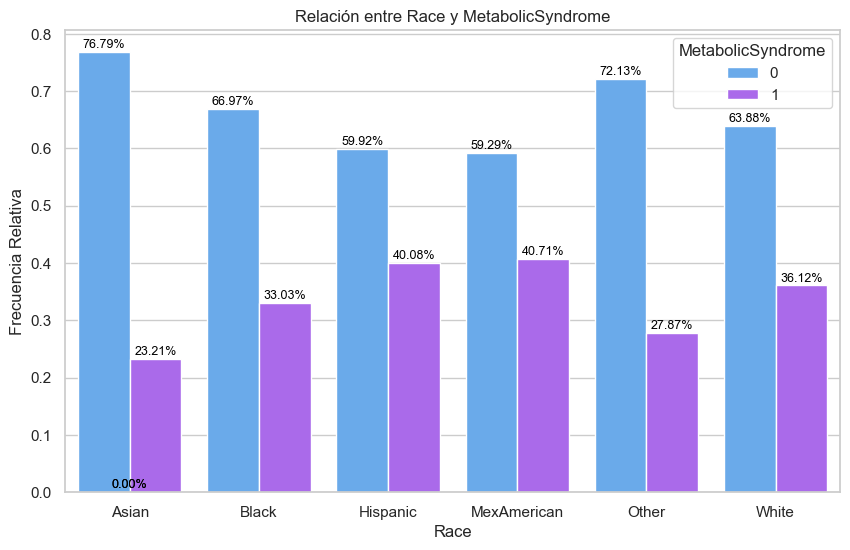

In [155]:
bivariante_cat(df_meta, "Race", "MetabolicSyndrome")

- Se observa que tanto en personas de raza negra como en blancos, se mantiene una tendencia del 65% aproximadamente de no tener Síndrome Metabólico y un 33% aproximado para aquellos que sí lo padecen. Por otro lado, en razas como la hispana o la mexico-americana, parece haber un ligero aumento tanto en quienes no sufren esta condición como en aquellos que sí la tienen. Sin embargo, en pacientes de origen asiático, parece haber una menor incidencia de esta condición.

- La gráfica sugiere que la raza parece ser un factor que influye en la presencia o ausencia del Síndrome Metabólico, pero considero que podría estar más relacionado con el índice de masa corporal o la circunferencia de la cintura (WaistCirc) que específicamente con la raza

In [159]:
# Empleamos el test chi2 para corroborar que estadísticamente existe relación entre Race y MetabolicSyndrome

tabla_contingencia = pd.crosstab(df_meta["MetabolicSyndrome"],df_meta["Race"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 30.37876529143362
P-Value: 1.2420912078884288e-05
Grados de Libertad: 5
Tabla de Frecuencias Esperadas:
 [[229.51728446 360.3881716  169.01416077 166.38359017  40.11620158
  613.58059142]
 [119.48271554 187.6118284   87.98583923  86.61640983  20.88379842
  319.41940858]]


-Estadísticamente, parece haber una relación entre estas dos variables. Sin embargo, tendríamos que estudiar más a fondo si es realmente por la raza o si hay más factores relacionados.

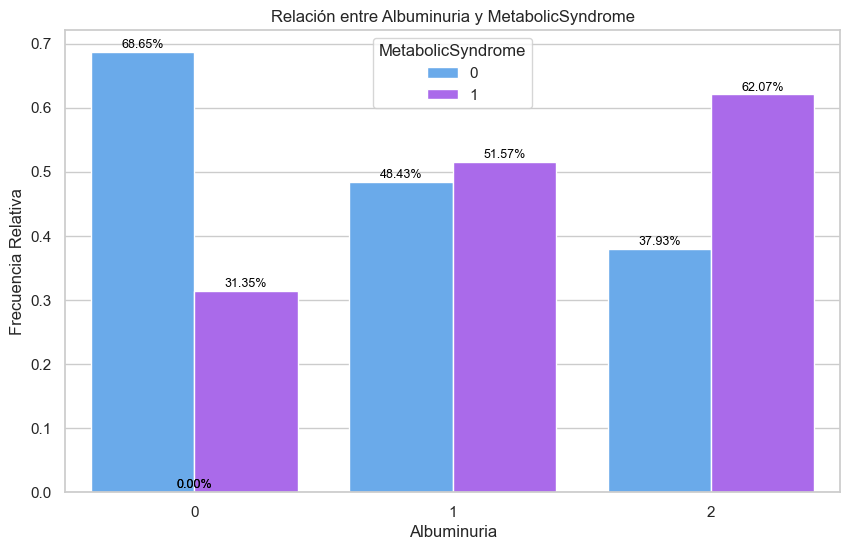

In [160]:
bivariante_cat(df_meta, "Albuminuria", "MetabolicSyndrome")

-En esta gráfica se evidencia la alta correlación entre ambas variables. Los pacientes que tienen valores altos de albúmina en orina son, en su mayoría, pacientes diagnosticados con síndrome metabólico. Es necesario realizar un análisis multivariante de los factores de riesgo de esta enfermedad con la variable albuminuria, ya que al observar esta relación podríamos establecer que padecer esta enfermedad puede llevar a un daño renal severo. Aunque no es objeto de estudio del presente EDA, sería interesante estudiar qué tan relacionado está el síndrome metabólico con la enfermedad renal severa.

In [161]:
# Empleamos el test chi2 para corroborar que estadísticamente existe relación entre Albuminuria y MetabolicSyndrome

tabla_contingencia = pd.crosstab(df_meta["MetabolicSyndrome"],df_meta["Race"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 30.37876529143362
P-Value: 1.2420912078884288e-05
Grados de Libertad: 5
Tabla de Frecuencias Esperadas:
 [[229.51728446 360.3881716  169.01416077 166.38359017  40.11620158
  613.58059142]
 [119.48271554 187.6118284   87.98583923  86.61640983  20.88379842
  319.41940858]]


- Confirmamos ésta estrecha relación entre ambas variables

In [176]:
def bivariante_num(df, columna_num, columna_cat):
    """
    Función para realizar un análisis bivariante entre una columna numérica y la variable objetivo binaria.

    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x = columna_cat, y = columna_num, data=df, whis = 3)
    plt.title(f'Análisis Bivariante entre  {columna_num} y {columna_cat}')
    plt.xlabel(columna_cat)
    plt.ylabel (columna_num)
    plt.show()

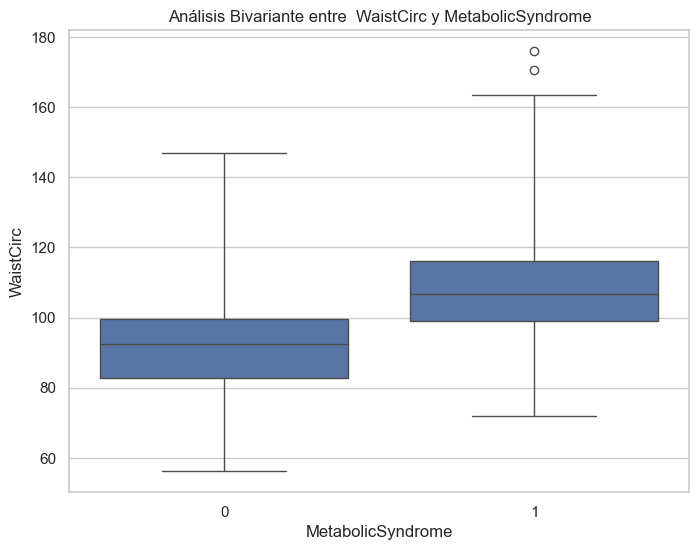

In [182]:
bivariante_num(df_meta, "WaistCirc", "MetabolicSyndrome")

- Hay diferencias significativas en las medianas de cada grupo
- No hay outliers en el grupo que no tiene sindrome metabólico

In [183]:
def histograma_bivariante(df, columna_num, columna_cat):
    plt.figure(figsize=(8, 6))
    sns.histplot(data = df, x= columna_num, hue = columna_cat, kde = True)
    

    plt.title(f'Análisis Bivariante entre {columna_num} y {columna_cat}')
    plt.xlabel(columna_num)
    plt.show()

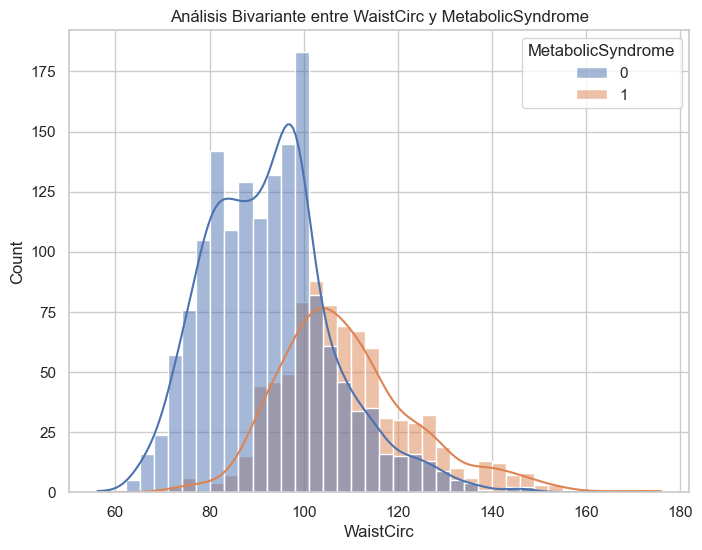

In [184]:
histograma_bivariante(df_meta, "WaistCirc", "MetabolicSyndrome")

- Hay una mayor concentración de pacientes sin sindrome metabólico y la gran mayoría de éstos pacientes tienen un circunferencia abdominal menor de 100 cm, mientras los pacientes que si padecen la enfermedad tiene medidas que se concentran en los 90 y los 160 cm de diametro.
- La distribución de los pacientes con sindrome metabólico parece normal mientras que la de los pacientes que son sanos es bimodal.
- Los pacientes que tiene una circuferencia abdominal entre 90 y 130 cm pueden pertenecer a ambos grupos
- Ésta distribución es la esperada, porque conocemos que para diagnosticar a un paciente con sindrome metabolico uno de los criterios a cumplir es: circunferencia abdominal ≥ 88 cm para las mujeres y ≥ 102 cm en hombres.
- Sería interesante realizar un análisis multivariante con la columna "Sex" para ver como se relacionan.


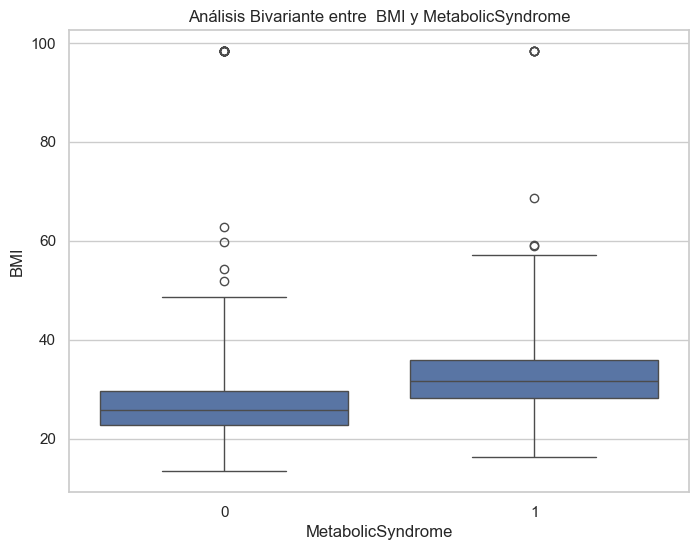

In [187]:
bivariante_num(df_meta, "BMI", "MetabolicSyndrome")

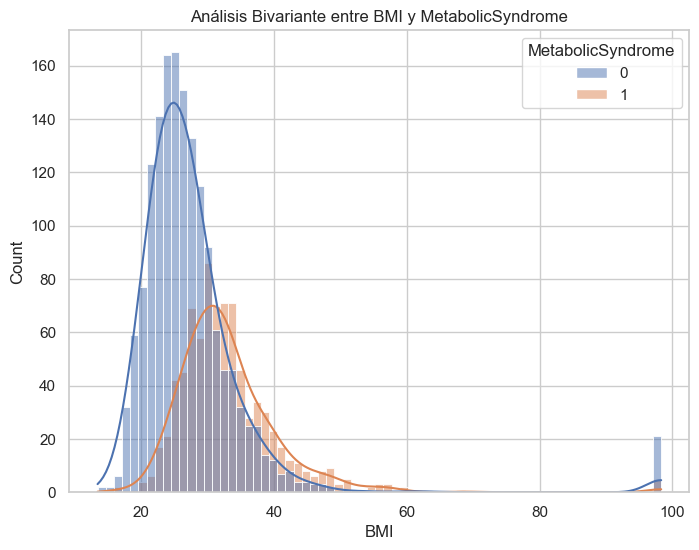

In [188]:
histograma_bivariante(df_meta, "BMI", "MetabolicSyndrome")

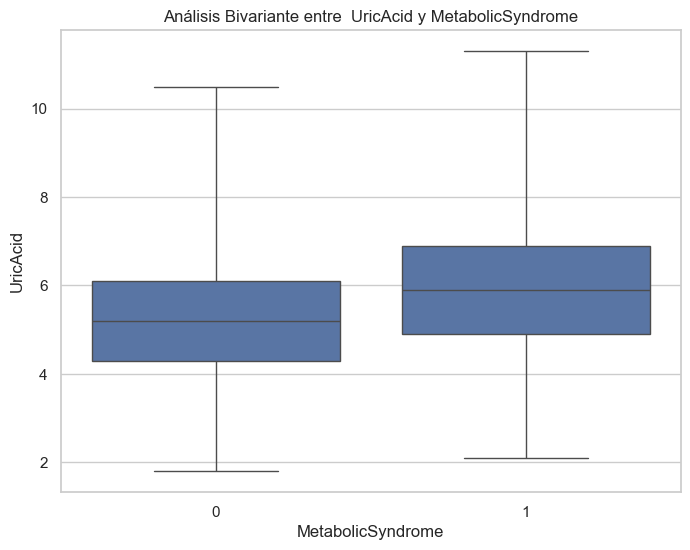

In [189]:
bivariante_num(df_meta, "UricAcid", "MetabolicSyndrome")

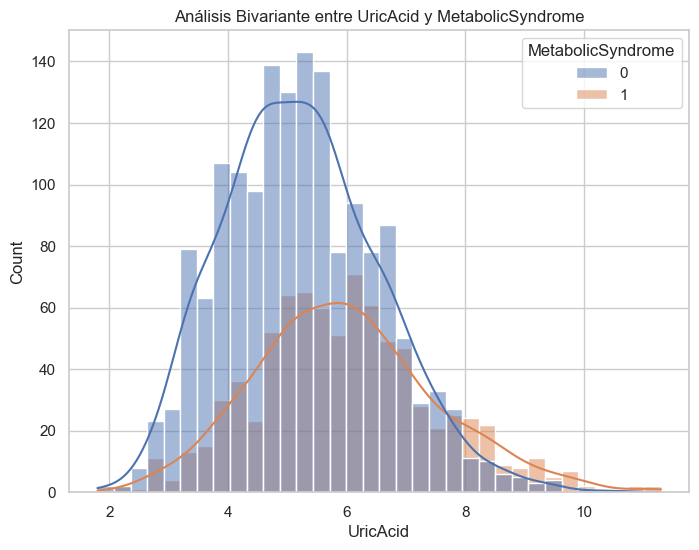

In [190]:
histograma_bivariante(df_meta, "UricAcid", "MetabolicSyndrome")

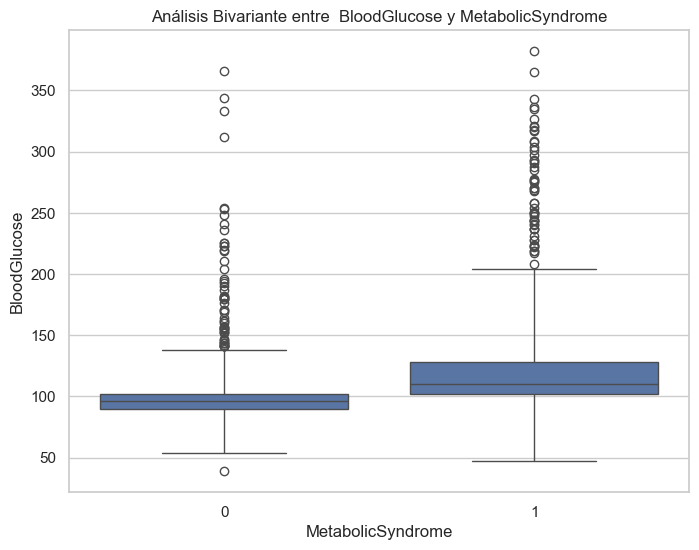

In [191]:
bivariante_num(df_meta, "BloodGlucose", "MetabolicSyndrome")

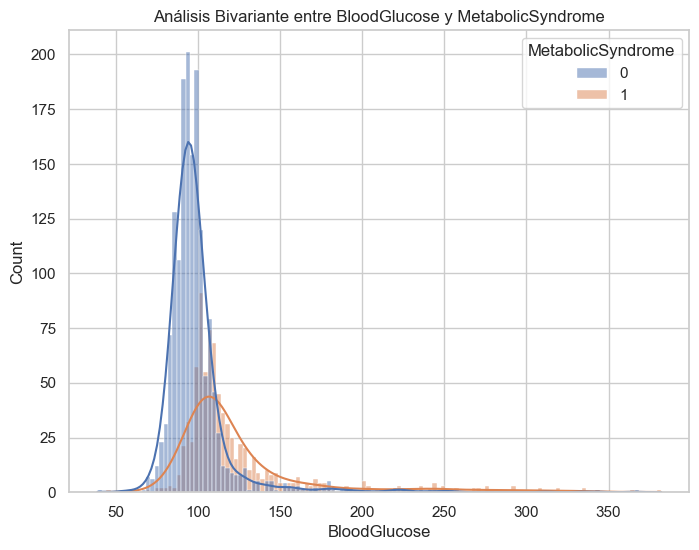

In [192]:
histograma_bivariante(df_meta, "BloodGlucose", "MetabolicSyndrome")

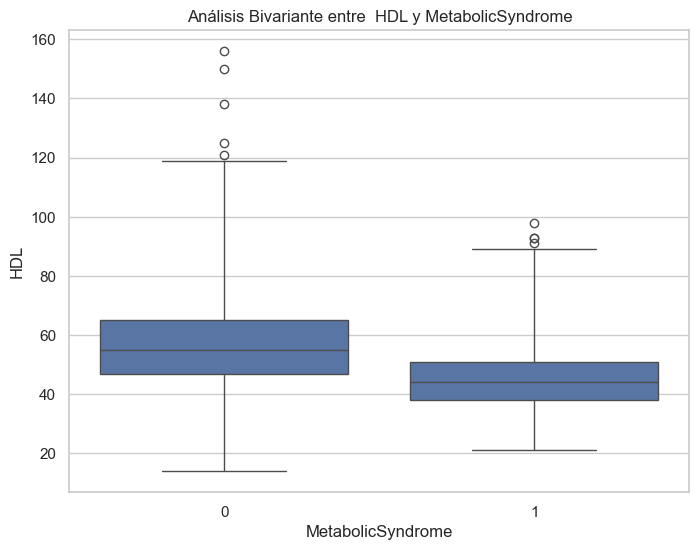

In [193]:
bivariante_num(df_meta, "HDL", "MetabolicSyndrome")

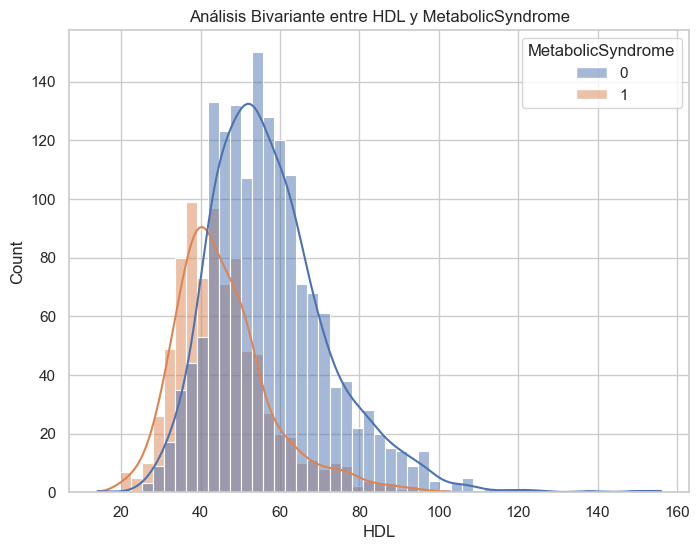

In [194]:
histograma_bivariante(df_meta, "HDL", "MetabolicSyndrome")

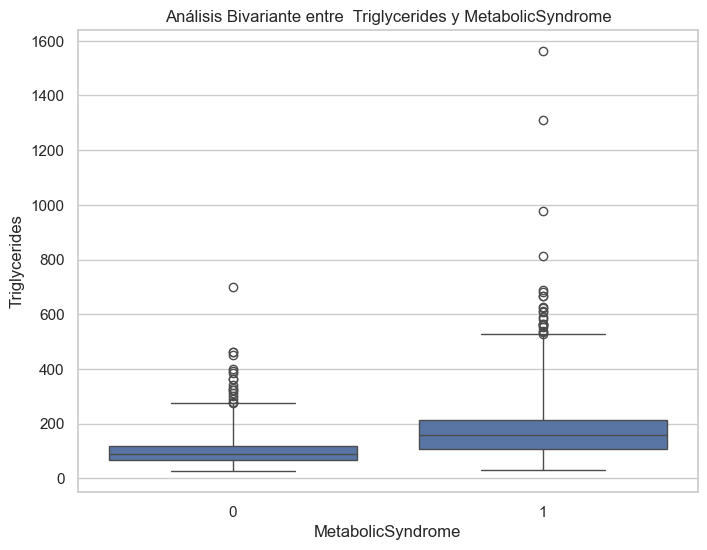

In [195]:
bivariante_num(df_meta, "Triglycerides", "MetabolicSyndrome")

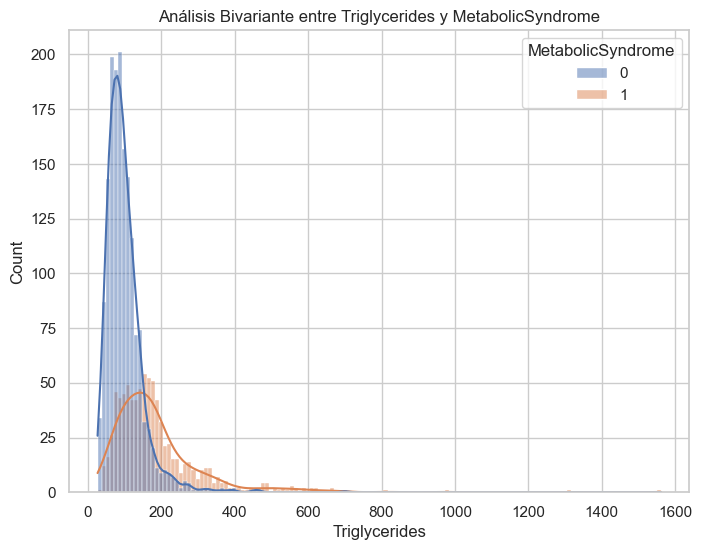

In [196]:
histograma_bivariante(df_meta, "Triglycerides", "MetabolicSyndrome")

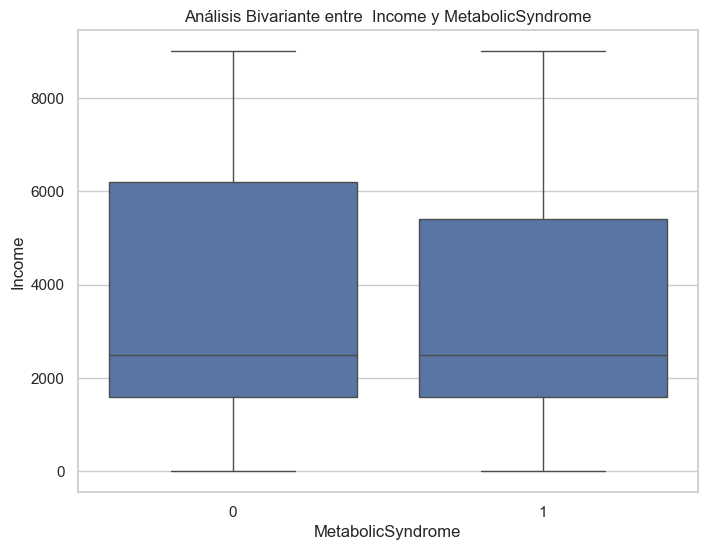

In [197]:
bivariante_num(df_meta, "Income", "MetabolicSyndrome")

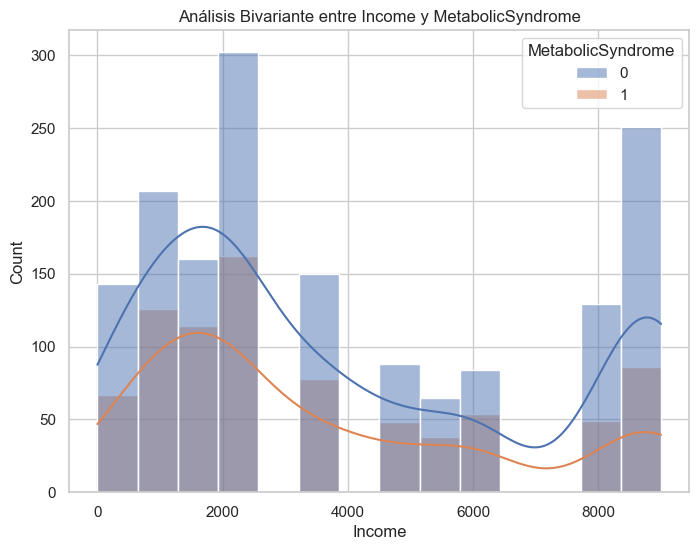

In [198]:
histograma_bivariante(df_meta, "Income", "MetabolicSyndrome")